In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
import scipy.stats as stats
import statistics
import re
from nlcor import nlcor
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import asarray as ar,exp
from scipy.stats import pearsonr
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches

In [9]:
basemodel_data = []
for subdir, dirs, files in os.walk('output_basemodel/plots_data'):
    for file in files:
        print(file)
        basemodel_data.append(file)

symmetry_005 = []
for subdir, dirs, files in os.walk('/Users/Aimee/Desktop/R_005_sym/plots_data'):
    for file in files:
        print(file)
        symmetry_005.append(file)

symmetry_0005 = []
for subdir, dirs, files in os.walk('/Users/Aimee/Desktop/R_0005_sym/plots_data'):
    for file in files:
        print(file)
        symmetry_0005.append(file)

symmetry_00005 = []
for subdir, dirs, files in os.walk('/Users/Aimee/Desktop/R_00005_sym/plots_data'):
    for file in files:
        print(file)
        symmetry_00005.append(file)

symmetry_000005 = []
for subdir, dirs, files in os.walk('/Users/Aimee/Desktop/R_000005_sym/plots_data'):
    for file in files:
        print(file)
        symmetry_000005.append(file)

20240323_script_iteration=17.csv
20240223_script_iteration=5.csv
20240223_script_iteration=4.csv
20240323_script_iteration=16.csv
20240323_script_iteration=14.csv
20240223_script_iteration=6.csv
20240223_script_iteration=7.csv
20240323_script_iteration=15.csv
20240323_script_iteration=11.csv
20240223_script_iteration=3.csv
20240223_script_iteration=2.csv
20240323_script_iteration=10.csv
20240323_script_iteration=12.csv
20240223_script_iteration=1.csv
20240323_script_iteration=13.csv
20240223_script_iteration=10..csv
20240323_script_iteration=2.csv
20240323_script_iteration=3.csv
20240323_script_iteration=4.csv
20240323_script_iteration=5.csv
20240323_script_iteration=7.csv
20240323_script_iteration=6.csv
20240323_script_iteration=9.csv
20240323_script_iteration=20.csv
20240323_script_iteration=18.csv
20240223_script_iteration=9.csv
20240223_script_iteration=8.csv
symmetry_iteration8.csv
symmetry_iteration9.csv
symmetry_iteration10.csv
symmetry_iteration4.csv
symmetry_iteration5.csv
sym

In [ ]:
# final_mean = pd.DataFrame()
# for i in basemodel_data:
#     data = pd.read_csv(f'output_basemodel/plots_data/{i}')
#     data = data[data['timestep'] > 160]
#     data = data.mean()
#     final_mean[i] = data
#     print(f'info processing {i}')
# 
# final_mean = final_mean.T
# 
# 
# sym00001_mean = pd.DataFrame()
# for i in symmetry_00001:
#     data = pd.read_csv(f'output_symmetry_0.00001/plots_data/{i}')
#     data = data[data['timestep'] > 160]
#     data = data.mean()
#     sym00001_mean[i] = data
#     print(f'info processing {i}')
# 
# sym00001_mean = sym00001_mean.T
# 
# sym0001_mean = pd.DataFrame()
# for i in symmetry_0001:
#     data = pd.read_csv(f'output_symmetry_0.0001/plots_data/{i}')
#     data = data[data['timestep'] > 160]
#     data = data.mean()
#     sym0001_mean[i] = data
#     print(f'info processing {i}')
# 
# sym0001_mean = sym0001_mean.T
# 
# sym001_mean = pd.DataFrame()
# for i in symmetry_001:
#     data = pd.read_csv(f'output_symmetry_0.001/plots_data/{i}')
#     data = data[data['timestep'] > 160]
#     data = data.mean()
#     sym001_mean[i] = data
#     print(f'info processing {i}')
# 
# sym001_mean = sym001_mean.T
# 
# sym005_mean = pd.DataFrame()
# for i in symmetry_005:
#     data = pd.read_csv(f'output_symmetry_0.005/plots_data/{i}')
#     data = data[data['timestep'] > 160]
#     data = data.mean()
#     sym005_mean[i] = data
#     print(f'info processing {i}')
# 
# sym005_mean = sym005_mean.T

<Figure size 600x880 with 0 Axes>

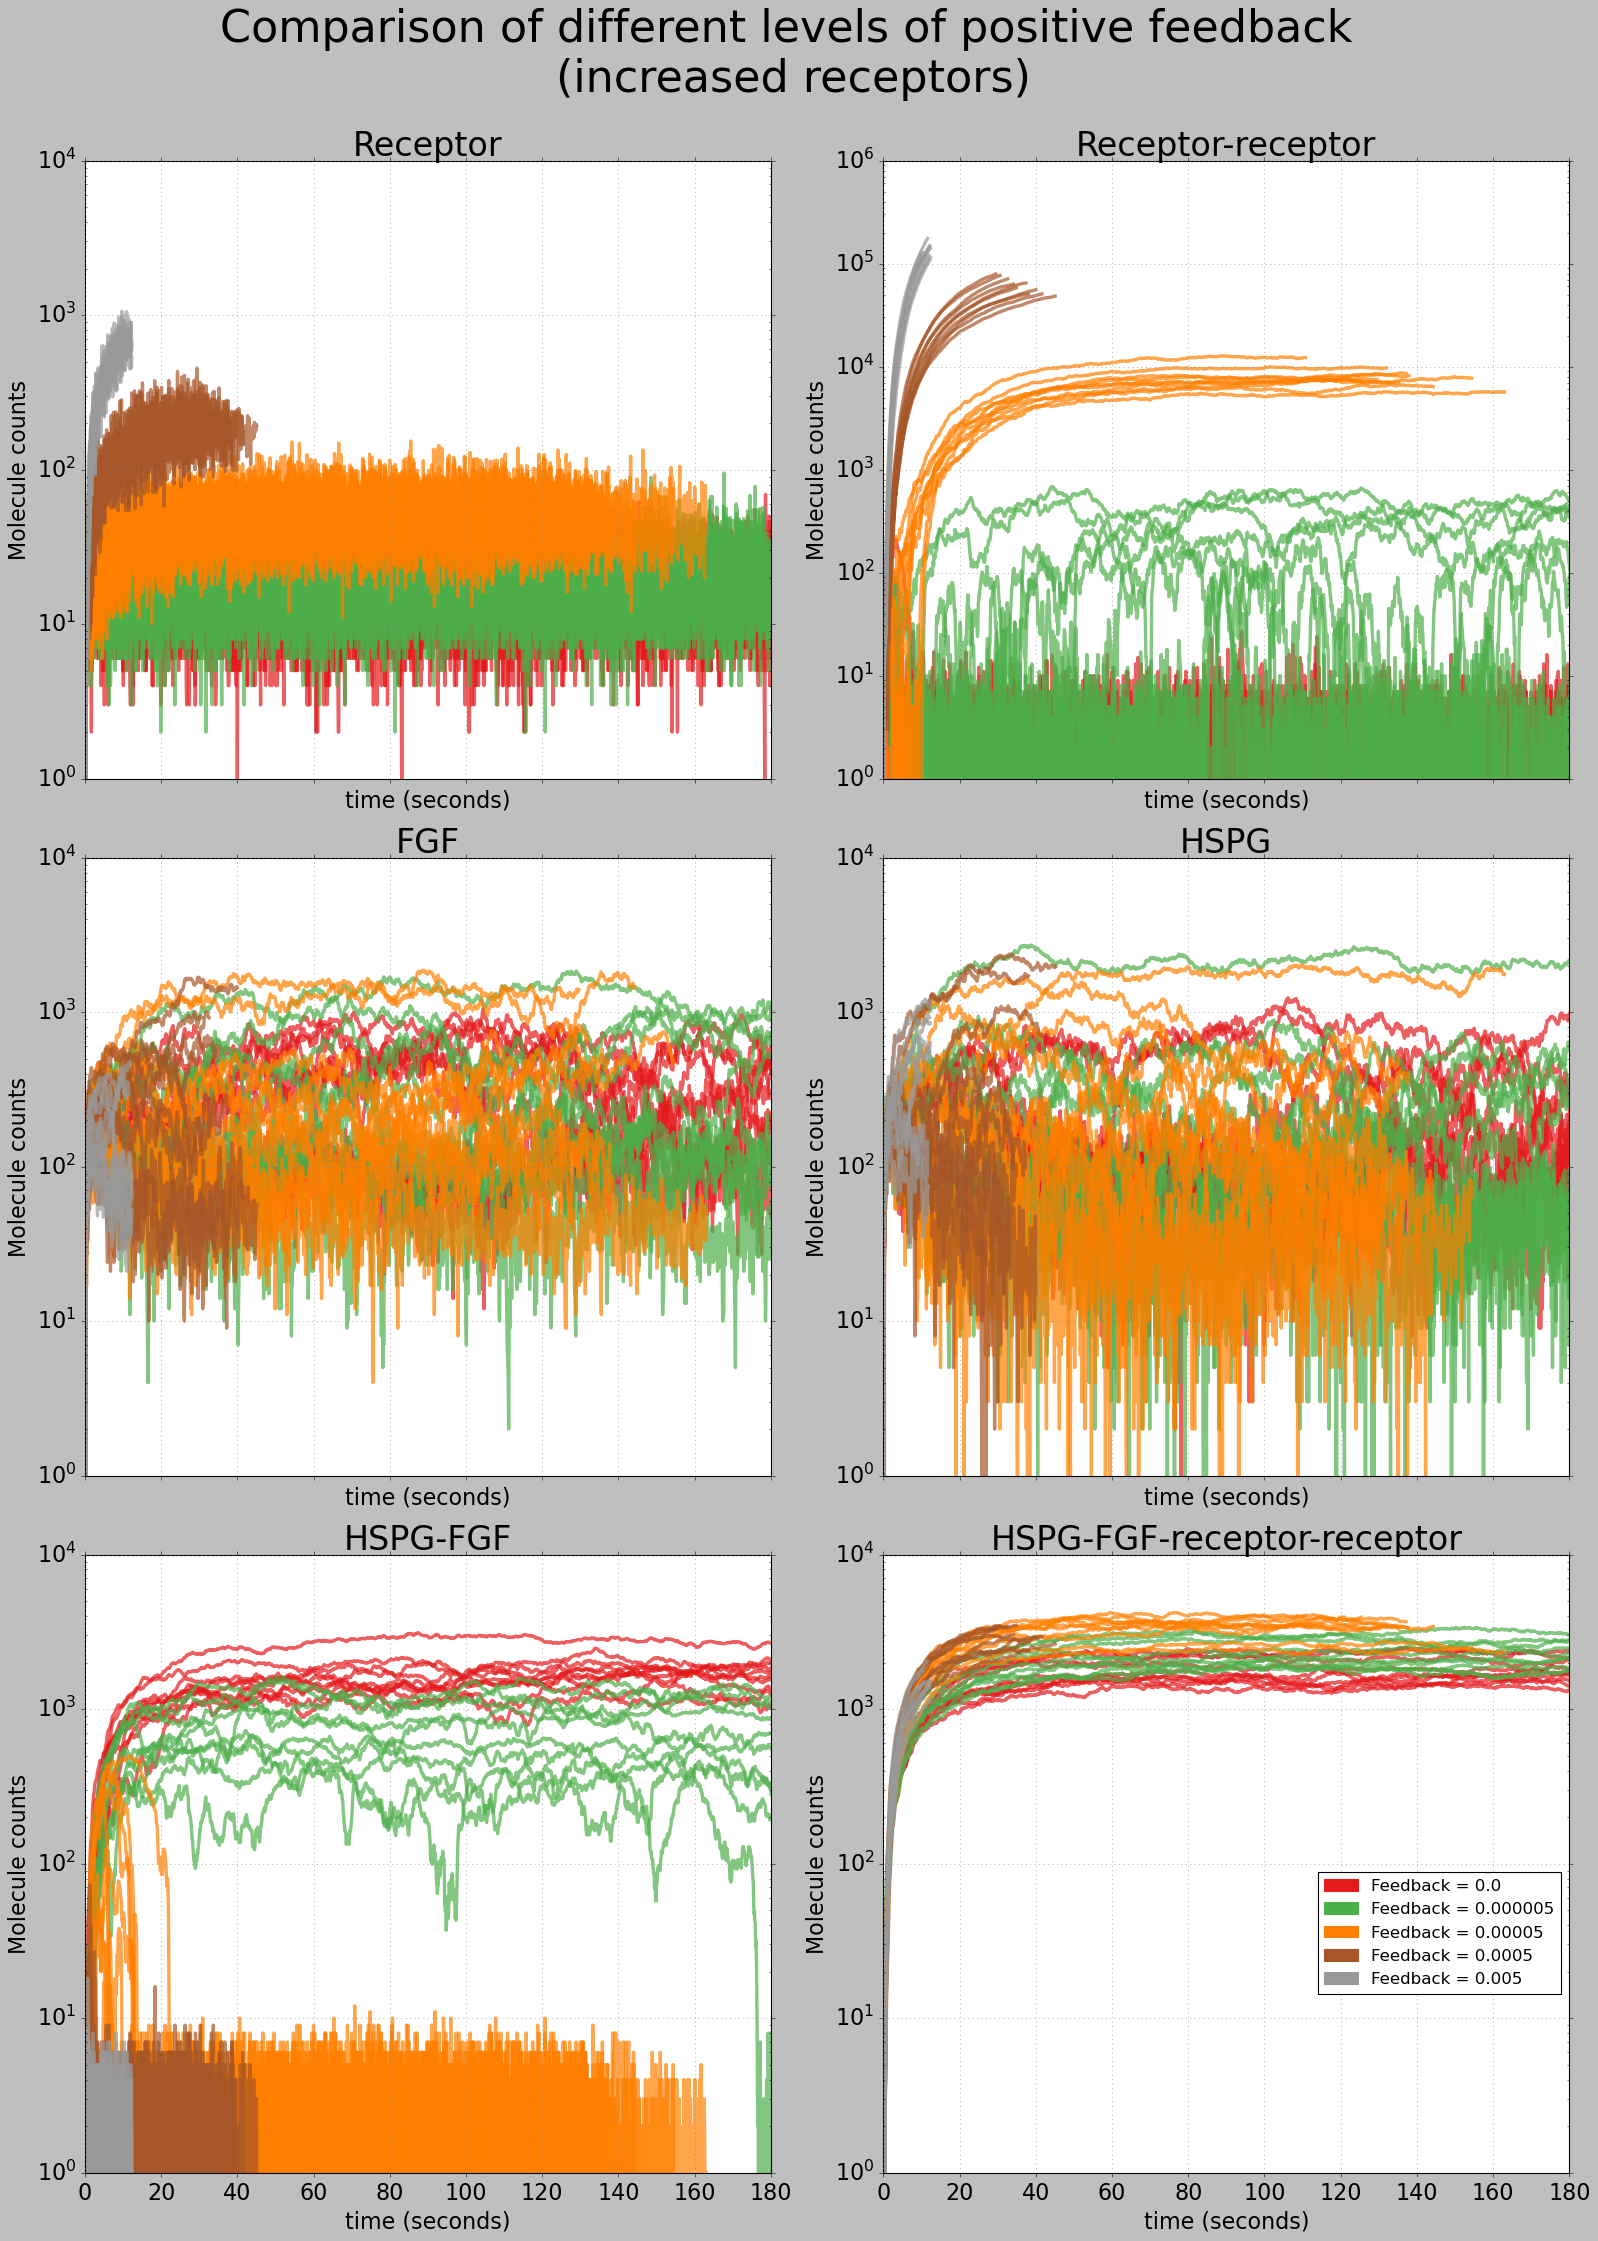

In [30]:
n_rows = 3
n_columns = 2
plt.figure(figsize=(7.5, 11))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 28), sharey=False, sharex=True)
plt.style.use('classic')

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.7

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[0], lw=3, alpha= my_alpha)
    axes[0,0].set_title('Receptor', fontsize=30)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[0,1].set_title('Receptor-receptor', fontsize=30)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[1,0].set_title('FGF', fontsize=30)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[1,1].set_title('HSPG', fontsize=30)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[0], lw=3, alpha=my_alpha)
    axes[2,0].set_title('HSPG-FGF', fontsize=30)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[0], lw=3, label='Basemodel (no feedback)', alpha=my_alpha)
    axes[2,1].set_title('HSPG-FGF-receptor-receptor', fontsize=30)


    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        # ax.axvspan(160, 180, color='orangered', alpha=0.1)
        ax.tick_params(labelsize=20, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=20)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=20)

for i, filename in enumerate(symmetry_000005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_000005_sym/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[1], lw=3, label = '', alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[1], lw=3, label = '', alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[1], lw=3, label='Feedback = 0.000005', alpha=my_alpha)


for i, filename in enumerate(symmetry_00005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_00005_sym/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[2], lw=3,  alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[2], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[2], lw=3, label='Feedback = 0.00005', alpha=my_alpha)

for i, filename in enumerate(symmetry_0005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_0005_sym/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[3], lw=3, alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[3], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[3], lw=3, label='Feedback = 0.0005', alpha=my_alpha)

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_005_sym/plots_data/{filename}')
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[4], lw=3, alpha= my_alpha)
    axes[0,1].plot(data['timestep'], data['13'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[1,0].plot(data['timestep'], data['10'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[2,0].plot(data['timestep'], data['14'], color=HFRRs[4], lw=3, alpha=my_alpha)
    axes[2,1].plot(data['timestep'], data['15'], color=HFRRs[4], lw=3, label='Feedback = 0.005', alpha=my_alpha)

plt.tick_params(axis='both', which='major', labelsize=20, direction='out')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.98, box.height*0.9])

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x000005_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.000005')
x00005_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.00005')
x0005_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.0005')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[2,1].legend(loc='best', bbox_to_anchor=(1.0, 0.5), fontsize='15', handles=[basemodel_patch, x000005_patch, x00005_patch, x0005_patch, x005_patch])
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors)', fontsize=40, y=1)
fig.tight_layout()
plt.savefig('/Users/Aimee/Desktop/R_sym_figs/molecule_counts_vs_time.png')

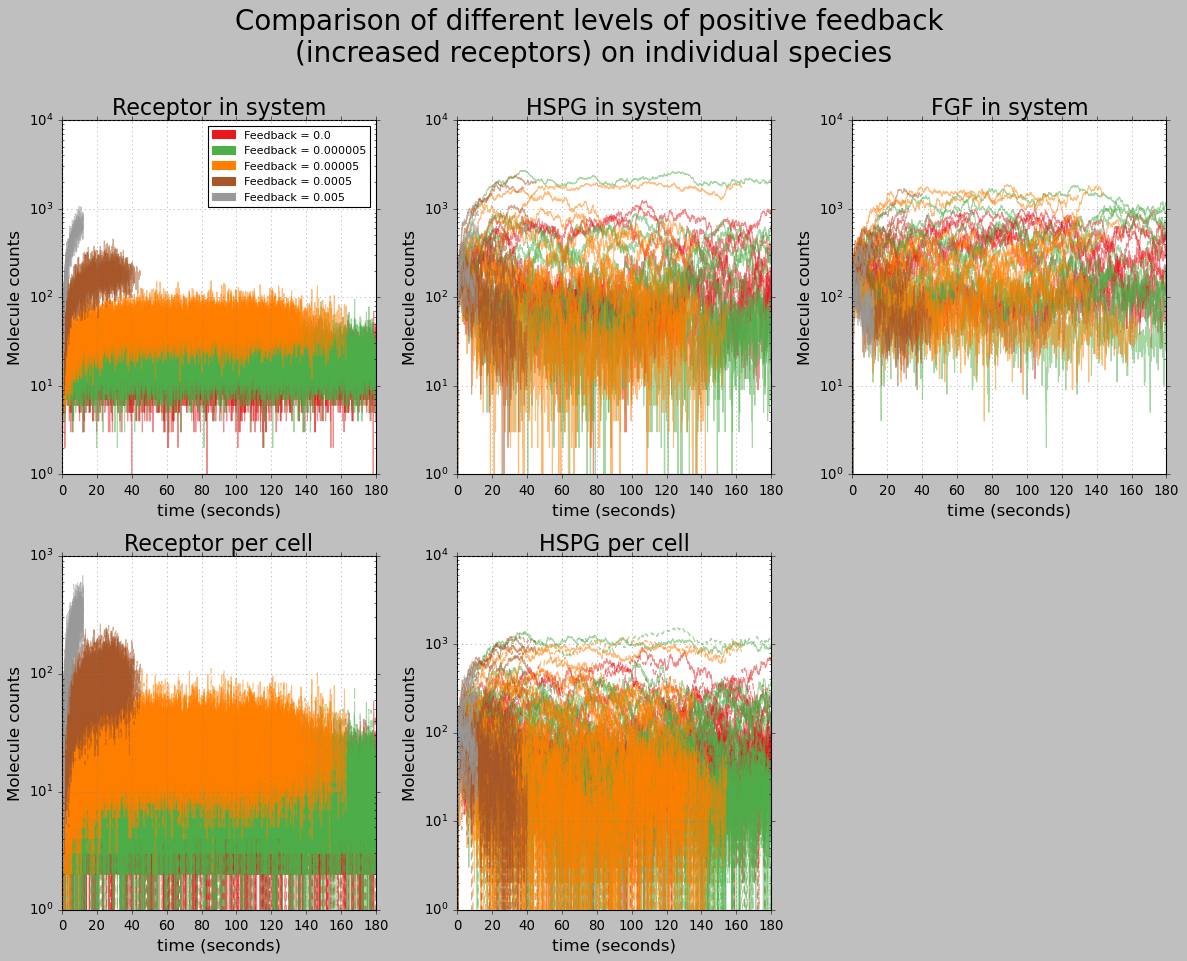

In [31]:
###### SPECIES COUNTS

fig, axes = plt.subplots(2,3, figsize=(15,12))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')
fig.delaxes(axes[1,2])

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor per cell', fontsize=title_size)

    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,2].set_title('FGF in system', fontsize=title_size)

    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG per cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)

for i, filename in enumerate(symmetry_000005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_000005_sym/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')


for i, filename in enumerate(symmetry_00005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_00005_sym/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')


for i, filename in enumerate(symmetry_0005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_0005_sym/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_005_sym/plots_data/{filename}')
    #### RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['12'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['12.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['12.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### FGF SPECIES
    axes[0,2].plot(data['timestep'], data['10'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    #### HSPG SPECIES
    axes[0,1].plot(data['timestep'], data['11'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['11.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['11.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x000005_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.000005')
x00005_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.00005')
x0005_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.0005')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[0,0].legend(loc='best', fontsize='10', handles=[basemodel_patch, x000005_patch, x00005_patch, x0005_patch, x005_patch])
plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors) on individual species', fontsize=25, y=1)
fig.tight_layout()
plt.savefig('/Users/Aimee/Desktop/R_sym_figs/individual_species_counts.png')

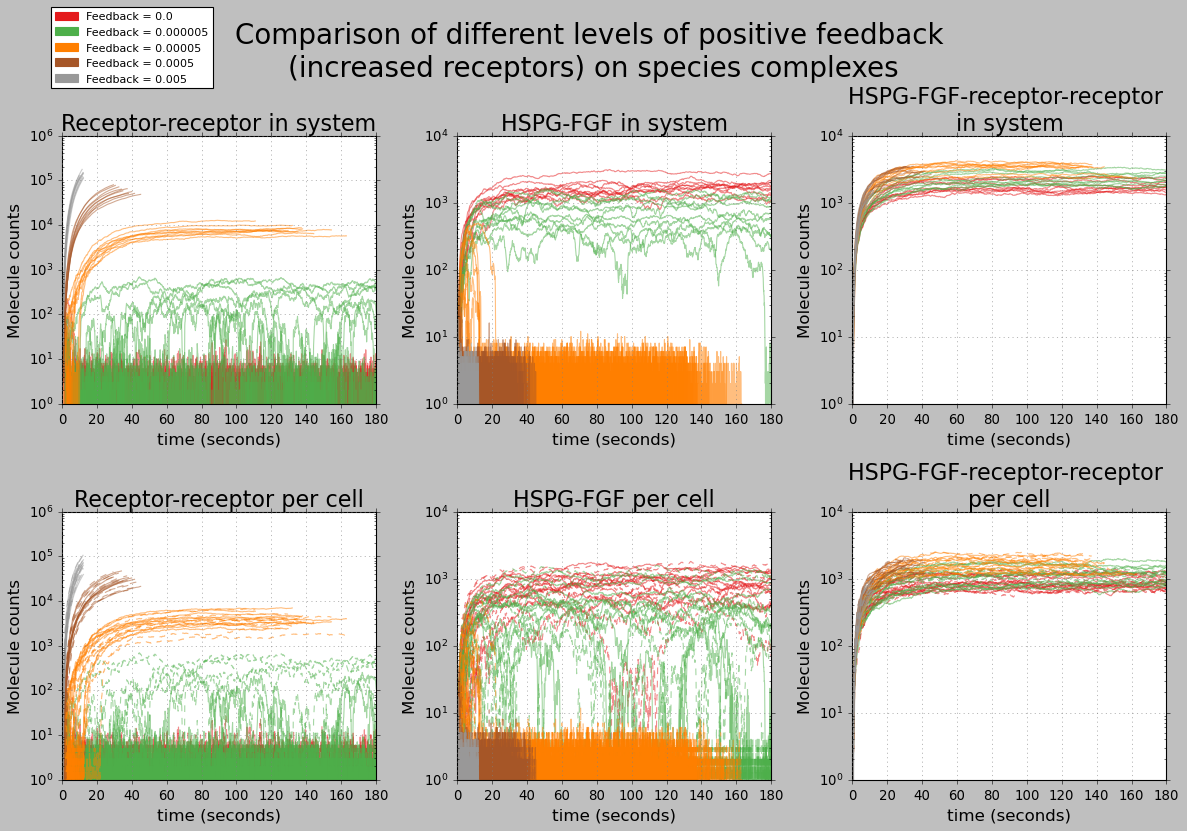

In [32]:
###### SPECIES COMPLEXES

fig, axes = plt.subplots(2,3, figsize=(15,12))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.style.use('classic')

cmap = plt.colormaps['Set1']
HFRRs = cmap(np.linspace(0,1,5))

my_alpha = 0.5

title_size = 20
tick_size = 12
label_size = 15
line_w = 1

for i, filename in enumerate(basemodel_data[:10]):
    data = pd.read_csv(f'output_basemodel/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[0,0].set_title('Receptor-receptor in system', fontsize=title_size)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,0].set_title('Receptor-receptor per cell', fontsize=title_size)

    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,1].set_title('HSPG-FGF in system', fontsize=title_size)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,1].set_title('HSPG-FGF per cell', fontsize=title_size)

    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[0,2].set_title('HSPG-FGF-receptor-receptor \nin system', fontsize=title_size)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[0], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    axes[1,2].set_title('HSPG-FGF-receptor-receptor \nper cell', fontsize=title_size)

    for i,ax in enumerate(axes.flatten()):
        ax.set(yscale='log', xlim=(0,180),)
        ax.grid(color='grey')
        ax.tick_params(labelsize=tick_size, direction='out')
        ax.set_xlabel(xlabel='time (seconds)', fontsize=label_size)
        ax.set_ylabel(ylabel='Molecule counts', fontsize=label_size)


for i, filename in enumerate(symmetry_000005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_000005_sym/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[1], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_00005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_00005_sym/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[2], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_0005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_0005_sym/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[3], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

for i, filename in enumerate(symmetry_005):
    data = pd.read_csv(f'/Users/Aimee/Desktop/R_005_sym/plots_data/{filename}')
    #### RECEPTOR-RECEPTOR SPECIES
    axes[0,0].plot(data['timestep'], data['13'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha= my_alpha)
    axes[1,0].plot(data['timestep'], data['13.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,0].plot(data['timestep'], data['13.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HSPG-FGF SPECIES
    axes[0,1].plot(data['timestep'], data['14'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,1].plot(data['timestep'], data['14.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,1].plot(data['timestep'], data['14.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')
    #### HHFRR SPECIES
    axes[0,2].plot(data['timestep'], data['15'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha=my_alpha)
    axes[1,2].plot(data['timestep'], data['15.1'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha)
    axes[1,2].plot(data['timestep'], data['15.2'], color=HFRRs[4], lw=line_w, label=f'Realisation {i+1}', alpha = my_alpha, linestyle='--')

basemodel_patch = mpatches.Patch(color=HFRRs[0], label='Feedback = 0.0')
x000005_patch = mpatches.Patch(color=HFRRs[1], label='Feedback = 0.000005')
x00005_patch = mpatches.Patch(color=HFRRs[2], label='Feedback = 0.00005')
x0005_patch = mpatches.Patch(color=HFRRs[3], label='Feedback = 0.0005')
x005_patch = mpatches.Patch(color=HFRRs[4], label='Feedback = 0.005')
axes[0,0].legend(bbox_to_anchor=(0.5, 1.5), fontsize='10', handles=[basemodel_patch, x000005_patch, x00005_patch, x0005_patch, x005_patch])
plt.tick_params(axis='both', which='major', labelsize=tick_size, direction='out')
#plt.legend(loc=(0.05, 0.05),fontsize=16)
fig.suptitle('Comparison of different levels of positive feedback \n(increased receptors) on species complexes', fontsize=25, y=0.85)
fig.tight_layout()
plt.savefig('/Users/Aimee/Desktop/R_sym_figs/species_complex_counts.png')